In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
import statsmodels.api as sm
from sklearn import metrics

In [2]:
# read the data
lead_data = pd.read_csv('Leads.csv')

In [3]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# check the dimension
lead_data.shape

(9240, 37)

In [5]:
# data description of the data
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# statistical description of the data
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Calculate the percentage of missing values for each column
missing_percentage = lead_data.isnull().mean() * 100

# Print the missing value percentage
print(missing_percentage)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

#### Replacing 'select' with null value as it represents no data avaiable

In [8]:
# Replace both 'Select' and 'select' with NaN in the entire DataFrame
lead_data.replace(['Select', 'select','Unknown'], np.nan, inplace=True)

#### checking the missing values again

In [9]:
# Calculate the percentage of missing values for each column
missing_percentage = lead_data.isnull().mean() * 100

# Print the missing value percentage
print(missing_percentage)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

#### Removing the columns that has missing values more than 30%

In [10]:
# Remove columns with more than 30% missing values
threshold = 0.30  # 30%
lead_data = lead_data.loc[:, lead_data.isnull().mean() <= threshold]

# Print the remaining columns
print(lead_data.columns)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [11]:
# Calculate the percentage of missing values for each column
missing_percentage = lead_data.isnull().mean() * 100

# Print the missing value percentage
print(missing_percentage)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

#### Fill the missing values

###### As most of the features are categorical fill  ['Lead Source', 'Last Activity', 'Country', 'What matters most to you in choosing a course','What is your current occupation'] with mode values

In [12]:
# List of columns to fill with their mode
columns_to_fill_cat = ['Lead Source', 'Last Activity', 'Country', 'What matters most to you in choosing a course','What is your current occupation']  # replace with your column names

# Fill missing values in specified columns with the mode value
for column in columns_to_fill_cat:
    lead_data[column].fillna(lead_data[column].mode()[0], inplace=True)

In [13]:
# List of columns to fill with their mean
columns_to_fill_num =['TotalVisits', 'Page Views Per Visit']

# Fill missing values in specified columns with the mode value
for column in columns_to_fill_num:
    lead_data[column].fillna(lead_data[column].mean(), inplace=True)


In [14]:
# Calculate the percentage of missing values for each column
missing_percentage = lead_data.isnull().mean() * 100

# Print the missing value percentage
print(missing_percentage)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

#### Converting Binary variables from (Y/N) to (1/0)

In [15]:
# Listing the binary variables
bin_var = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
           'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']
# defining the map function
def binary_map(x):
    return x.map({'Yes':1,
                  'Receive More Updates About Our Courses':1,
                  'Update me on Supply Chain Content':1,
                  'Get updates on DM Content':1,
                  'I agree to pay the amount through cheque':1,
                  'No':0})

# Applying the map function
lead_data[bin_var] = lead_data[bin_var].apply(binary_map)

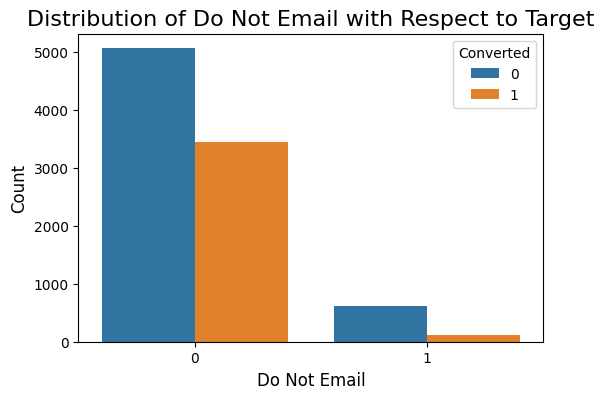

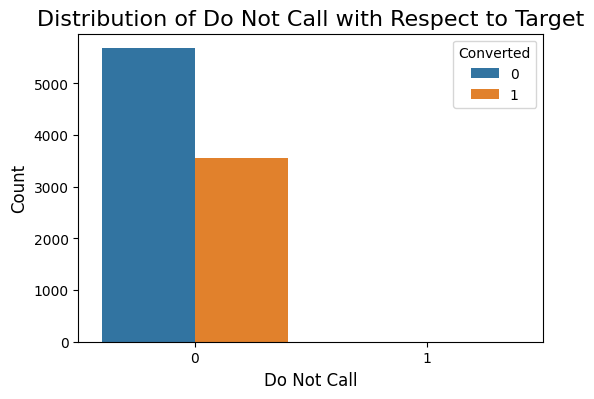

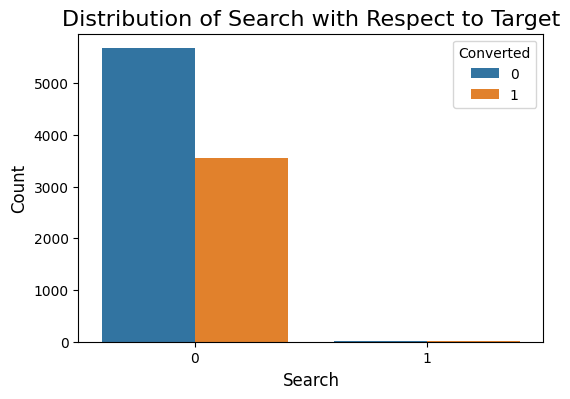

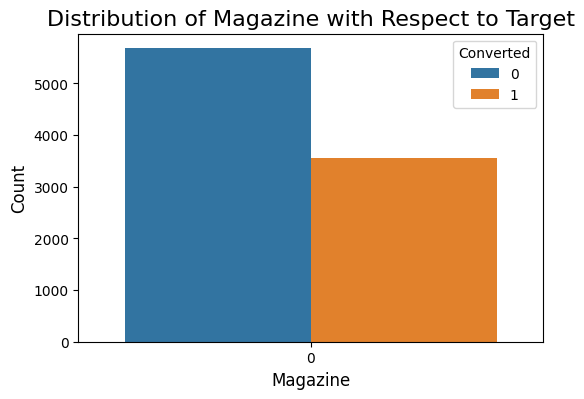

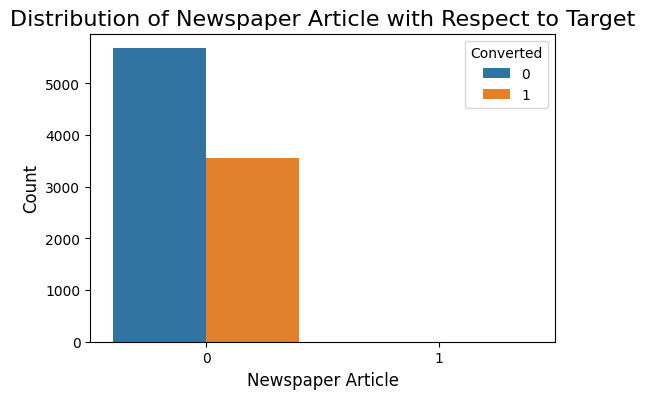

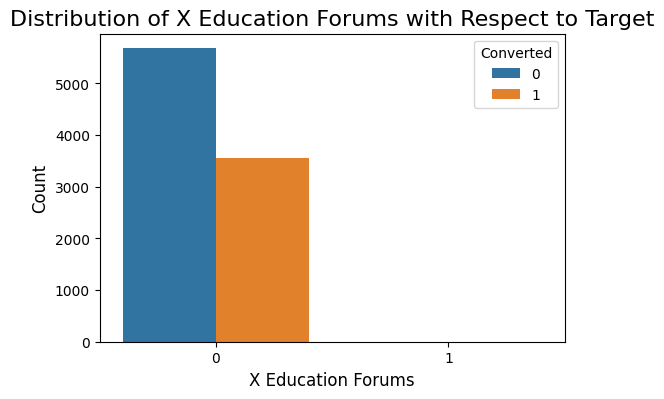

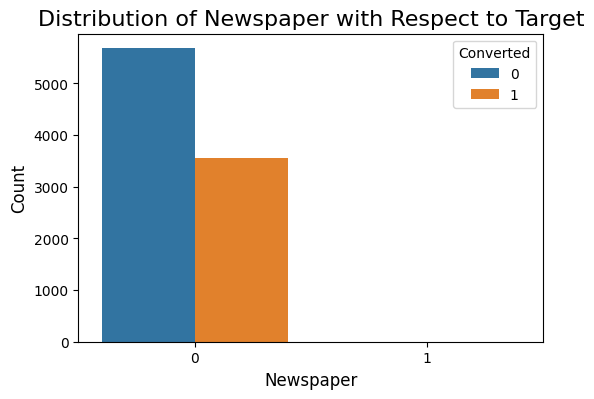

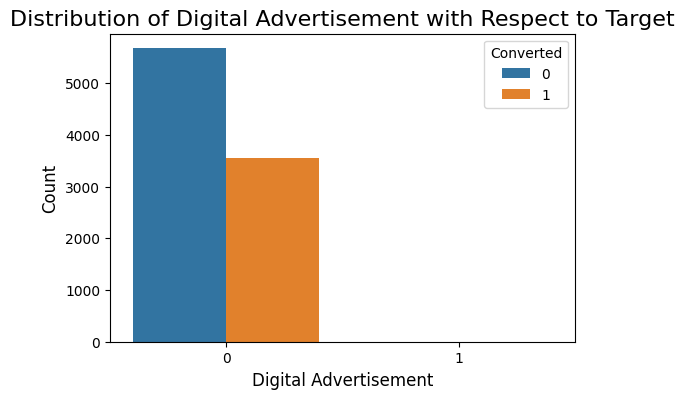

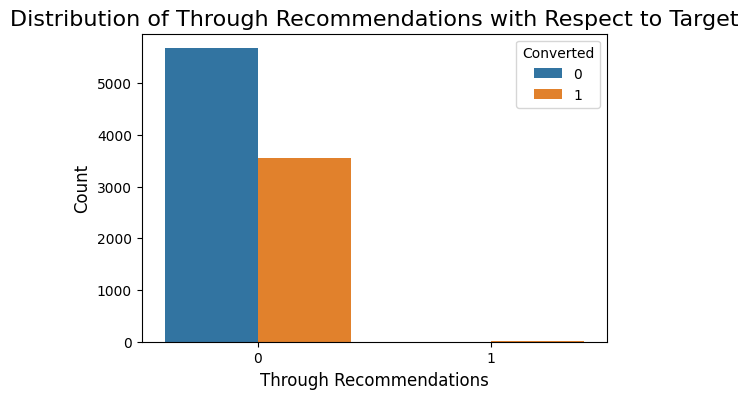

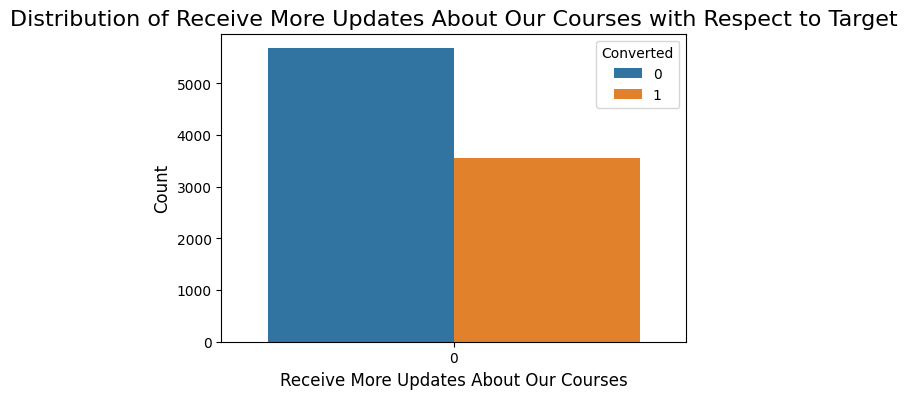

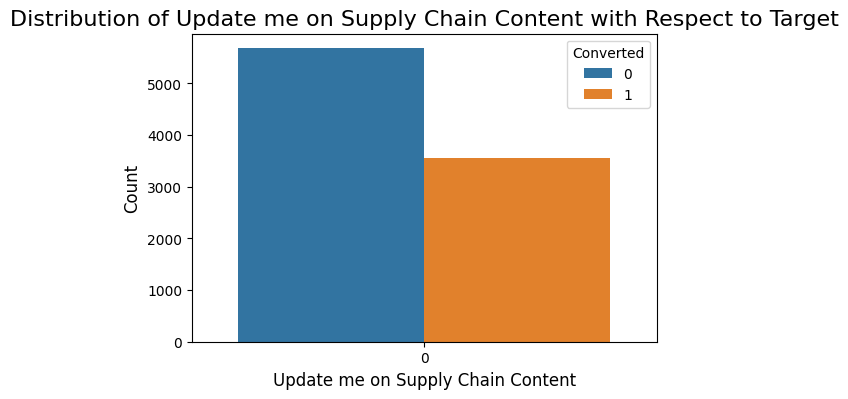

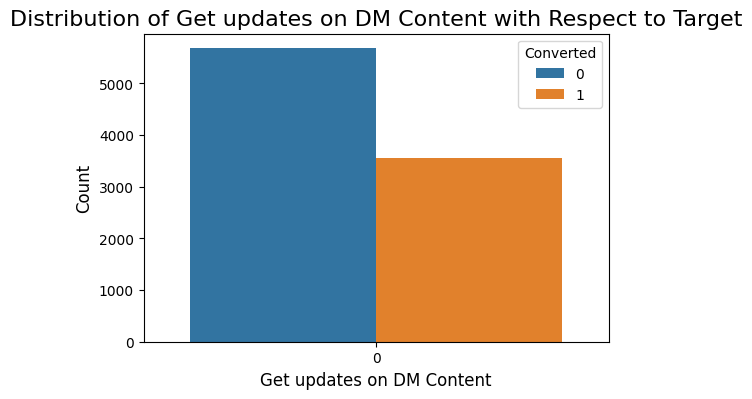

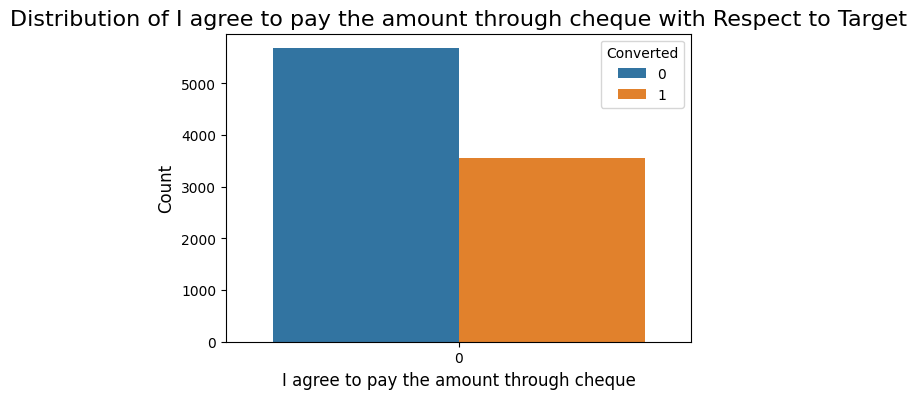

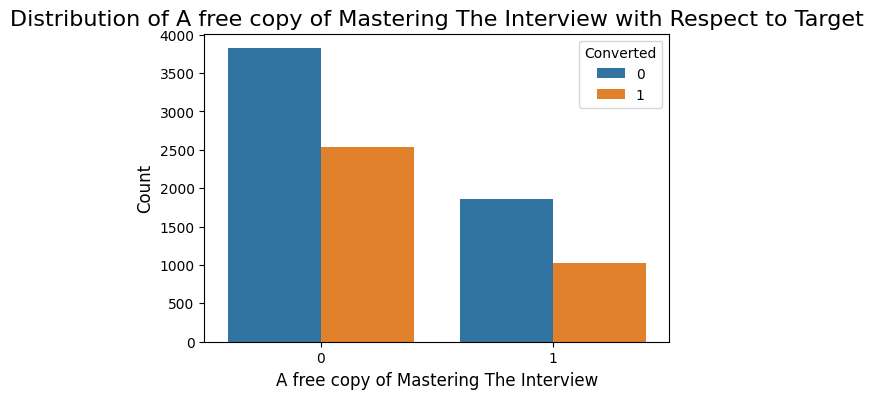

In [16]:
# Loop through the binary features and plot each with respect to the target 'Converted'
for feature in bin_var:
    plt.figure(figsize=(6,4))
    sns.countplot(x=feature, hue='Converted', data=lead_data)
    plt.title(f'Distribution of {feature} with Respect to Target', fontsize=16)
    plt.xlabel(f'{feature}', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()

#### Treating the categorical variable

##### Converting countries to continent to reduce the number of dummy variables

In [17]:
# Converting countries to continent to reduce the number of dummy variables
# Dictionary to map countries to continents
country_to_continent = {
    'India': 'Asia', 'Russia': 'Europe/Asia', 'Kuwait': 'Asia', 'Oman': 'Asia', 
    'United Arab Emirates': 'Asia', 'United States': 'North America', 'Australia': 'Oceania', 
    'United Kingdom': 'Europe', 'Bahrain': 'Asia', 'Ghana': 'Africa', 'Singapore': 'Asia', 
    'Qatar': 'Asia', 'Saudi Arabia': 'Asia', 'Belgium': 'Europe', 'France': 'Europe', 
    'Sri Lanka': 'Asia', 'China': 'Asia', 'Canada': 'North America', 'Netherlands': 'Europe', 
    'Sweden': 'Europe', 'Nigeria': 'Africa', 'Hong Kong': 'Asia', 'Germany': 'Europe', 
    'Asia/Pacific Region': 'Asia', 'Uganda': 'Africa', 'Kenya': 'Africa', 'Italy': 'Europe', 
    'South Africa': 'Africa', 'Tanzania': 'Africa', 'unknown': 'Unknown', 'Malaysia': 'Asia', 
    'Liberia': 'Africa', 'Switzerland': 'Europe', 'Denmark': 'Europe', 'Philippines': 'Asia', 
    'Bangladesh': 'Asia', 'Vietnam': 'Asia', 'Indonesia': 'Asia'
}

# Create a new column 'Continent' by mapping the 'Country' column
lead_data['Continent'] = lead_data['Country'].map(country_to_continent)

# Drop the 'Country' column from the DataFrame
lead_data.drop('Country', axis=1, inplace=True)

##### Grouping the Last Notable Activity in 4 categories
###### Email Interaction
###### Website Interaction
###### Phone or SMS
###### Chat Interaction
###### Other

In [18]:
# Define a dictionary to map each value to a specific category
interaction_grouping = {
    'Modified': 'Other',
    'Email Opened': 'Email Interaction',
    'Page Visited on Website': 'Website Interaction',
    'Email Bounced': 'Email Interaction',
    'Email Link Clicked': 'Email Interaction',
    'Unreachable': 'Other',
    'Unsubscribed': 'Other',
    'Had a Phone Conversation': 'Phone or SMS',
    'Olark Chat Conversation': 'Chat Interaction',
    'SMS Sent': 'Phone or SMS',
    'Approached upfront': 'Other',
    'Resubscribed to emails': 'Email Interaction',
    'View in browser link Clicked': 'Email Interaction',
    'Form Submitted on Website': 'Website Interaction',
    'Email Received': 'Email Interaction',
    'Email Marked Spam': 'Email Interaction'
}

# Create 'Last Notable Activity' column with differnt grouping
lead_data['Last Notable Activity'] = lead_data['Last Notable Activity'].map(interaction_grouping)

##### Grouping lead Source into following categories
###### Search Engines
###### Social Media
###### Direct Traffic
###### Referrals
###### Paid Ads
###### Internal Sources
###### others

In [19]:
# Defining the group for lead source
source_grouping = {
    'Olark Chat': 'Internal Sources',                     
    'Organic Search': 'Search Engines',
    'Direct Traffic': 'Direct Traffic',
    'Google': 'Search Engines',
    'Referral Sites': 'Referrals',
    'Welingak Website': 'Direct Traffic',
    'Reference': 'Referrals',
    'google': 'Search Engines',
    'Facebook': 'Social Media',
    'blog': 'Internal Sources',
    'Pay per Click Ads': 'Paid Ads',
    'bing': 'Search Engines',
    'Social Media': 'Social Media',
    'WeLearn': 'Internal Sources',
    'Click2call': 'Internal Sources',
    'Live Chat': 'Internal Sources',
    'welearnblog_Home': 'Internal Sources',
    'youtubechannel': 'Social Media',
    'testone': 'Other',
    'Press_Release': 'Other',
    'NC_EDM': 'Other'
}

# Create a new column 'Continent' by mapping the 'Country' column
lead_data['Lead Source'] = lead_data['Lead Source'].map(source_grouping)

##### Grouping the Last  Activity in following categories
###### Email Interaction
###### Website Interaction
###### Phone or SMS
###### Chat Interaction
###### Lead Generation
###### Other

In [20]:
Last_Activity_grp = {
    'Page Visited on Website': 'Website Interaction',
    'Email Opened': 'Email Interaction',
    'Unreachable': 'Other',
    'Converted to Lead': 'Lead Generation',
    'Olark Chat Conversation': 'Chat Interaction',
    'Email Bounced': 'Email Interaction',
    'Email Link Clicked': 'Email Interaction',
    'Form Submitted on Website': 'Lead Generation',
    'Unsubscribed': 'Other',
    'Had a Phone Conversation': 'Phone or SMS',
    'View in browser link Clicked': 'Email Interaction',
    'Approached upfront': 'Other',
    'SMS Sent': 'Phone or SMS',
    'Visited Booth in Tradeshow': 'Event Interaction',
    'Resubscribed to emails': 'Email Interaction',
    'Email Received': 'Email Interaction',
    'Email Marked Spam': 'Email Interaction'
}
          
# Create a new column 'Continent' by mapping the 'Country' column
lead_data['Last Activity'] = lead_data['Last Activity'].map(Last_Activity_grp)

In [21]:
# Creating a dummy variable for some of the categorical variables and dropping the first occurrence of the column
dummy_cat = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Continent',
                                      'What is your current occupation', 
                                      'What matters most to you in choosing a course', 
                                      'Last Notable Activity']])

# Adding the resultant dummy variables to lead_data
lead_data = pd.concat([lead_data, dummy_cat], axis=1)

# Dropping the original categorical columns from lead_data
lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Continent', 
                'What is your current occupation', 
                'What matters most to you in choosing a course', 
                'Last Notable Activity'], axis=1, inplace=True)

In [22]:
lead_data.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Chat Interaction,Last Notable Activity_Email Interaction,Last Notable Activity_Other,Last Notable Activity_Phone or SMS,Last Notable Activity_Website Interaction
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,True,False,True,False,False,False,False,True,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,True,False,True,False,False,False,True,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,False,False,True,False,False,False,True,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,True,False,True,False,False,False,False,True,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,True,False,True,False,False,False,False,True,False,False


In [23]:
# Convert all boolean columns to integers (1 and 0)
lead_data = lead_data.astype({col: 'int' for col in lead_data.select_dtypes(include='bool').columns})

lead_data.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Chat Interaction,Last Notable Activity_Email Interaction,Last Notable Activity_Other,Last Notable Activity_Phone or SMS,Last Notable Activity_Website Interaction
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,1,0,1,0,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,1,0,1,0,0,0,1,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,1,0,1,0,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,1,0,1,0,0,0,0,1,0,0


In [24]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 60 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Prospect ID                                                              9240 non-null   object 
 1   Lead Number                                                              9240 non-null   int64  
 2   Do Not Email                                                             9240 non-null   int64  
 3   Do Not Call                                                              9240 non-null   int64  
 4   Converted                                                                9240 non-null   int64  
 5   TotalVisits                                                              9240 non-null   float64
 6   Total Time Spent on Website                                             

#### Analysis of variable

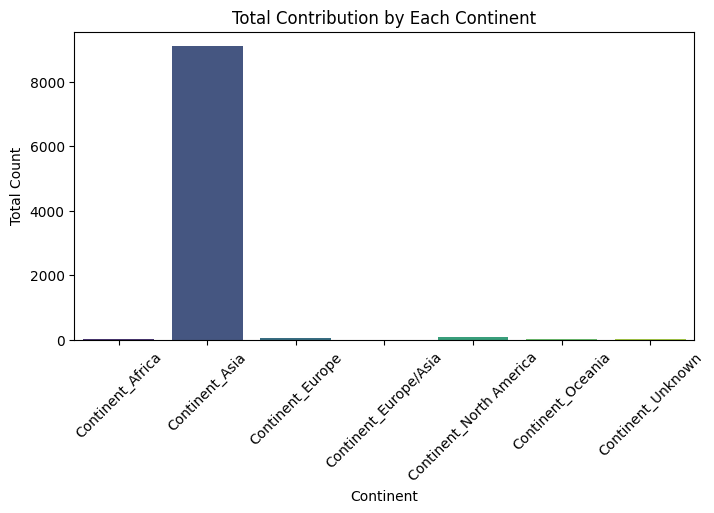

In [25]:
# Frequency distribution for each Continent column
continent_columns = ['Continent_Africa','Continent_Asia', 'Continent_Europe', 'Continent_Europe/Asia', 'Continent_North America', 'Continent_Oceania', 'Continent_Unknown']

# Sum the counts of each continent
continent_sums = lead_data[continent_columns].sum()


# Plot a bar chart for total contribution by each continent
plt.figure(figsize=(8, 4))
sns.barplot(x=continent_sums.index, y=continent_sums.values, palette="viridis")
plt.title('Total Contribution by Each Continent')
plt.xlabel('Continent')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.show()

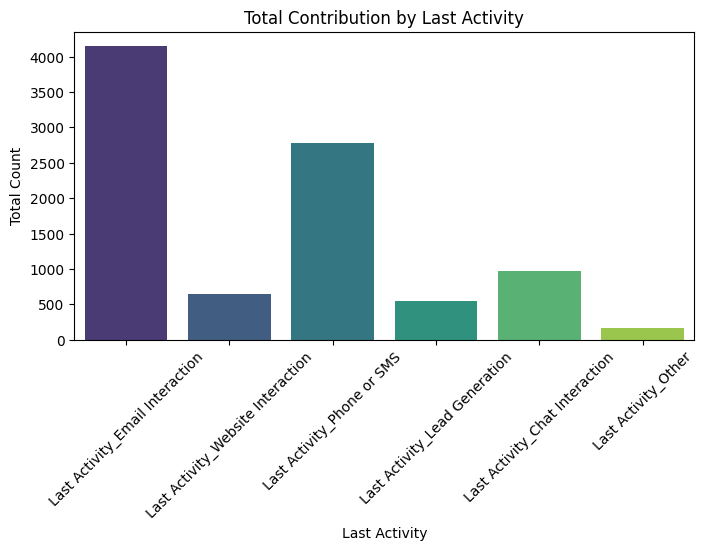

In [26]:
# Frequency distribution for each Last Activity column
Last_Activity_columns = ['Last Activity_Email Interaction', 'Last Activity_Website Interaction', 
                         'Last Activity_Phone or SMS', 'Last Activity_Lead Generation','Last Activity_Chat Interaction','Last Activity_Other']

# Sum the counts of each Last Activity
Last_Activity = lead_data[Last_Activity_columns].sum()

# Plot a bar chart for total contribution by each Last Activity
plt.figure(figsize=(8, 4))
sns.barplot(x=Last_Activity.index, y=Last_Activity.values, palette="viridis")
plt.title('Total Contribution by Last Activity')
plt.xlabel('Last Activity')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.show()

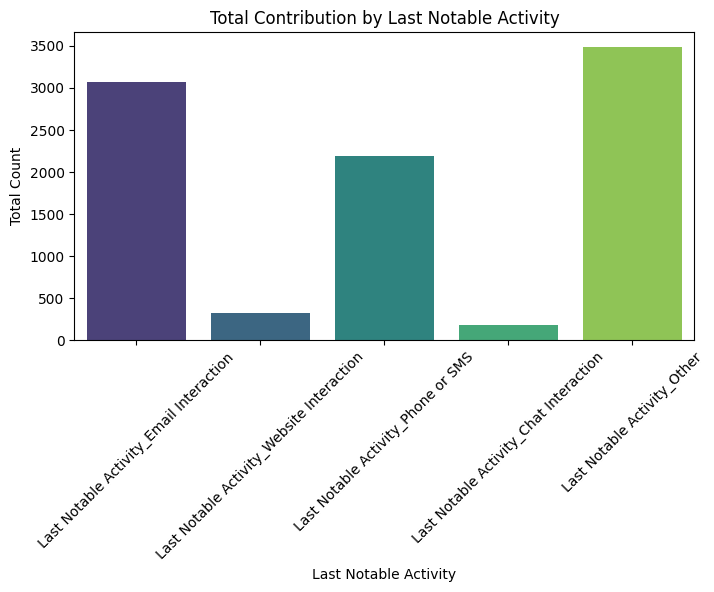

In [27]:
# Frequency distribution for each Last Notable Activity column
Last_Notable_Activity_columns = ['Last Notable Activity_Email Interaction', 'Last Notable Activity_Website Interaction', 
                         'Last Notable Activity_Phone or SMS', 'Last Notable Activity_Chat Interaction','Last Notable Activity_Other']

# Sum the counts of each Last Notable Activity
Last_Notable_Activity = lead_data[Last_Notable_Activity_columns].sum()

# Plot a bar chart for total contribution by each Last Notable Activity
plt.figure(figsize=(8, 4))
sns.barplot(x=Last_Notable_Activity.index, y=Last_Notable_Activity.values, palette="viridis")
plt.title('Total Contribution by Last Notable Activity')
plt.xlabel('Last Notable Activity')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.show()

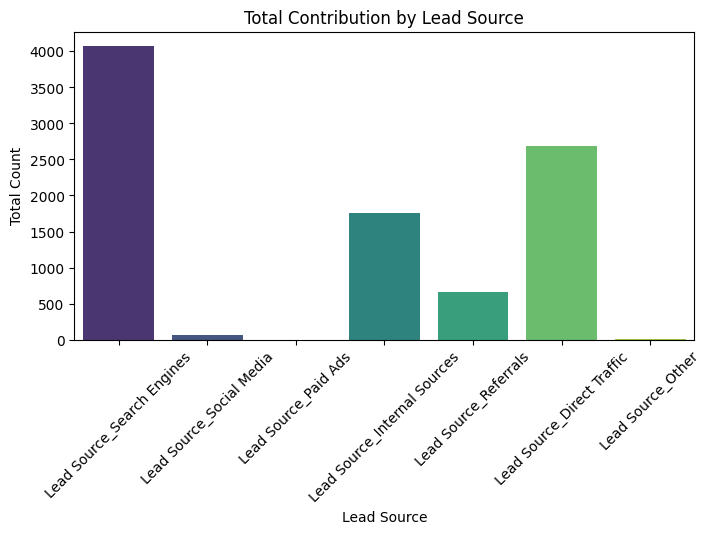

In [28]:
# Frequency distribution for each Lead Source column
Lead_Source_columns = ['Lead Source_Search Engines', 'Lead Source_Social Media', 'Lead Source_Paid Ads',
                          'Lead Source_Internal Sources', 'Lead Source_Referrals','Lead Source_Direct Traffic',
                          'Lead Source_Other']

# Sum the counts of each Last Activity
Lead_Source = lead_data[Lead_Source_columns].sum()

# Plot a bar chart for total contribution by each Last Activity
plt.figure(figsize=(8, 4))
sns.barplot(x=Lead_Source.index, y=Lead_Source.values, palette="viridis")
plt.title('Total Contribution by Lead Source')
plt.xlabel('Lead Source')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.show()

#### Check for outliers

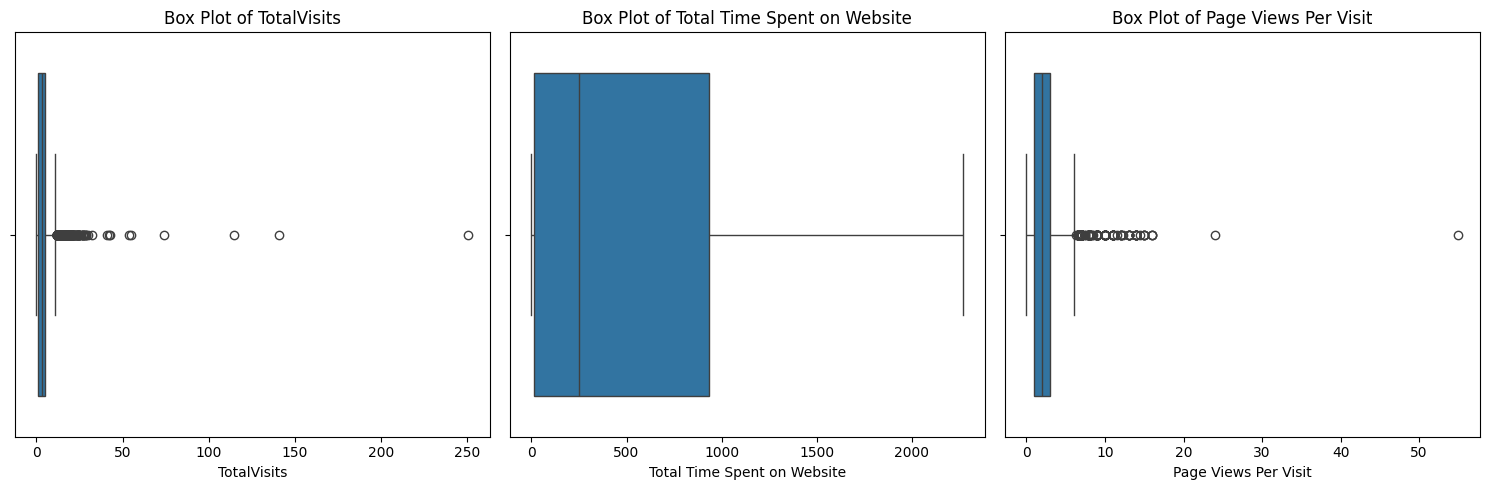

In [29]:
# Columns to check
columns_to_check = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot each feature separately
for i, col in enumerate(columns_to_check):
    sns.boxplot(data=lead_data, x=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)

# Adjust the layout
plt.tight_layout()
plt.show()

In [30]:
columns_to_check = lead_data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
columns_to_check.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.445238,487.698268,2.362820
std,4.818723,548.021466,2.145333
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


##### Remove the outliers 

In [31]:
# Define a function to remove outliers using IQR by replacing them with NaN
def remove_outliers_iqr(df, columns):
    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with NaN in the specified column
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])
        
    return df

# Specify the columns to remove outliers from
columns_to_check = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Remove outliers by replacing them with NaN
lead_data_cleaned = remove_outliers_iqr(lead_data, columns_to_check)

# Check the cleaned DataFrame
print(lead_data_cleaned[columns_to_check].describe())  # Summary statistics of the affected columns


       TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  8973.000000                  9240.000000           8880.000000
mean      2.992644                   487.698268              2.108882
std       2.563758                   548.021466              1.644409
min       0.000000                     0.000000              0.000000
25%       1.000000                    12.000000              1.000000
50%       3.000000                   248.000000              2.000000
75%       4.000000                   936.000000              3.000000
max      11.000000                  2272.000000              6.000000


##### Replace the mising value with median
Had the distribution been normal we could have gone mean value, as the data is skewed we would be using median to fill the missing values

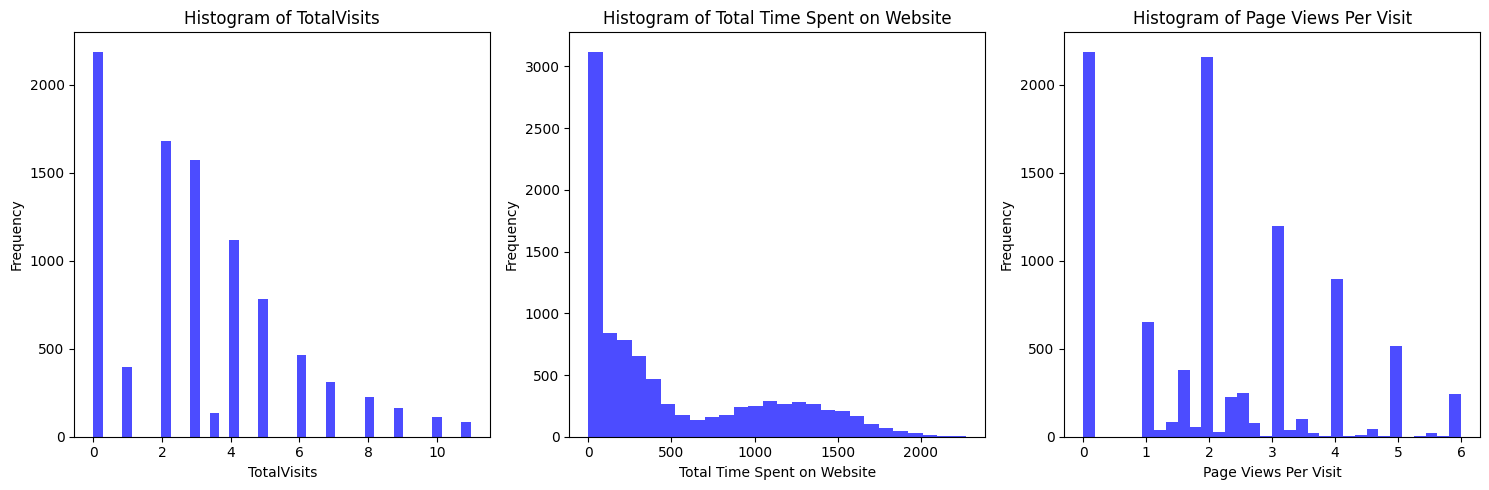

In [32]:
# Fill missing values with the median
for column in columns_to_check:
    lead_data[column].fillna(lead_data[column].median(), inplace=True)

# Create histograms for each column
plt.figure(figsize=(15, 5))

for i, column in enumerate(columns_to_check):
    plt.subplot(1, 3, i + 1)  # Create subplots
    plt.hist(lead_data[column], bins='auto', color='blue', alpha=0.7)  # Use automatic binning
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


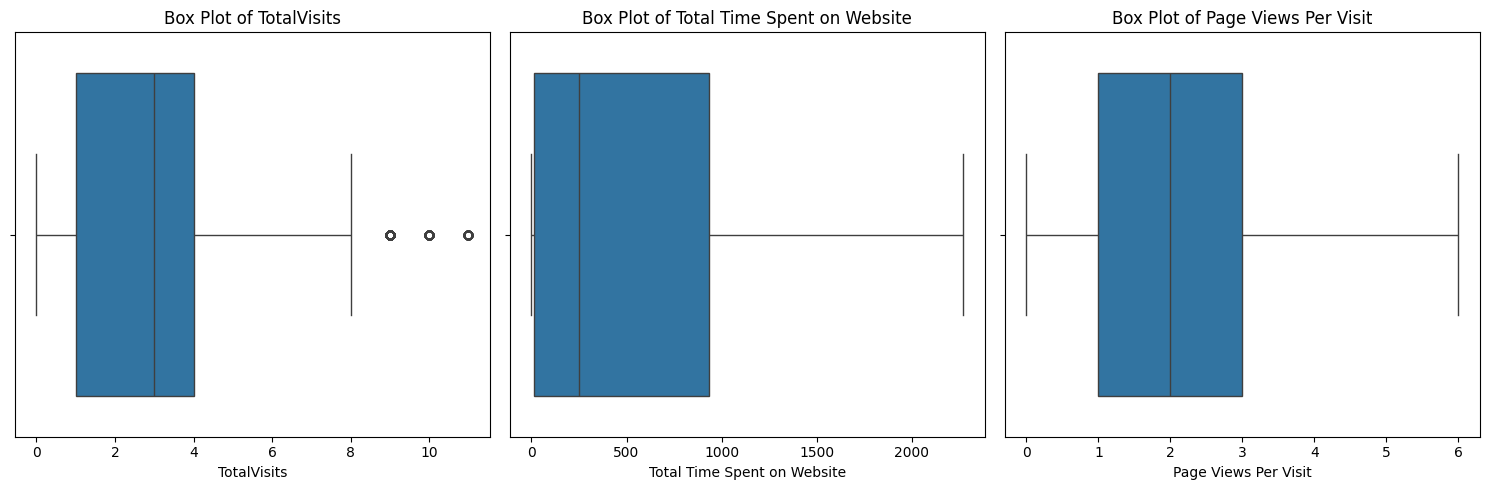

In [33]:
# Columns to check
columns_to_check = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot each feature separately
for i, col in enumerate(columns_to_check):
    sns.boxplot(data=lead_data, x=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)

# Adjust the layout
plt.tight_layout()
plt.show()

Class distribution (counts):
Converted
0    5679
1    3561
Name: count, dtype: int64

Class distribution (percentages):
Converted
0    61.461039
1    38.538961
Name: proportion, dtype: float64


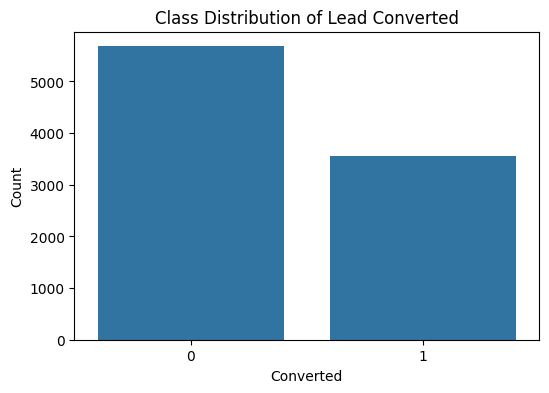

In [34]:
# Check for class imbalance
class_counts = lead_data['Converted'].value_counts()
# Calculate the percentage of each class
class_percentage = lead_data['Converted'].value_counts(normalize=True) * 100

print("Class distribution (counts):")
print(class_counts)
print("\nClass distribution (percentages):")
print(class_percentage)

# Plot class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='Converted', data=lead_data)
plt.title('Class Distribution of Lead Converted')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.show()

In [35]:
# Imbalance ratio
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

Imbalance Ratio: 1.59


##### This means for every 1 lead that converts, there are approximately 1.59 leads that do not convert. It's not an extreme imbalance.

##### Check for correlation

In [36]:
# Dropping the specified columns without reassigning
lead_data.drop(['Prospect ID', 'Lead Number','Receive More Updates About Our Courses','Magazine','I agree to pay the amount through cheque','Update me on Supply Chain Content','Get updates on DM Content'], axis=1, inplace=True)

In [37]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 53 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   float64
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Search                                                                  

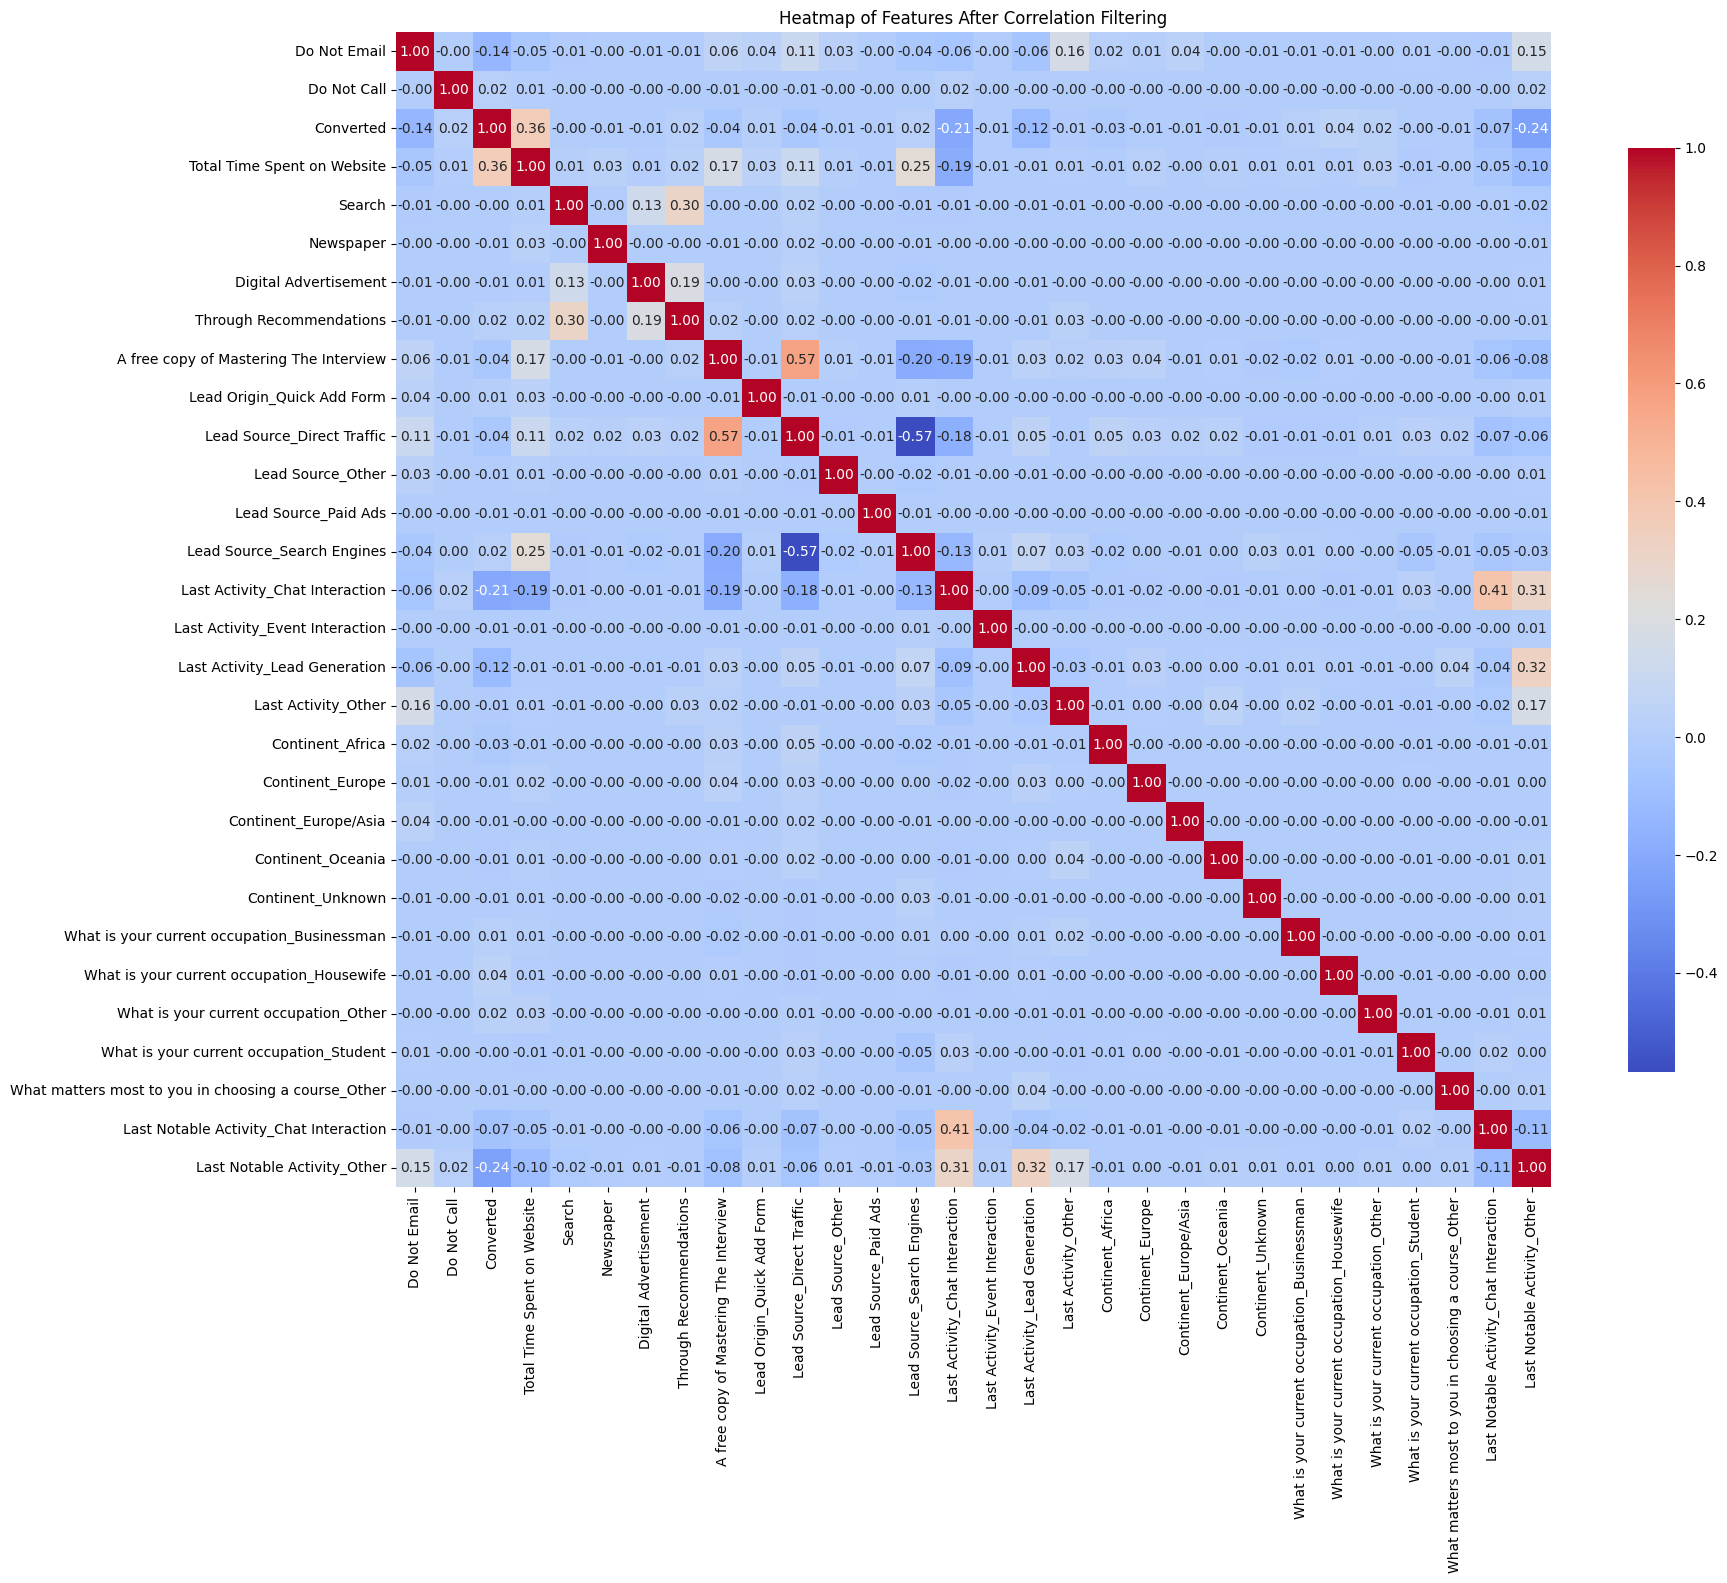

Dropped features due to high correlation: ['Lead Origin_Landing Page Submission', 'TotalVisits', 'Continent_Asia', 'Last Notable Activity_Email Interaction', 'Last Notable Activity_Website Interaction', 'What is your current occupation_Unemployed', 'Lead Source_Social Media', 'Lead Origin_Lead Add Form', 'What is your current occupation_Working Professional', 'Newspaper Article', 'Last Notable Activity_Phone or SMS', 'Lead Source_Referrals', 'Continent_North America', 'Lead Origin_API', 'Lead Source_Internal Sources', 'Page Views Per Visit', 'Last Activity_Website Interaction', 'Last Activity_Phone or SMS', 'Last Activity_Email Interaction', 'Lead Origin_Lead Import', 'What matters most to you in choosing a course_Better Career Prospects', 'What matters most to you in choosing a course_Flexibility & Convenience', 'X Education Forums']


In [38]:
# Set your desired correlation thresholds
lower_threshold = -0.6
upper_threshold = 0.6

# Calculate the correlation matrix
correlation_matrix = lead_data.corr()

# Identify features to drop based on the correlation thresholds
to_drop = []
for col in correlation_matrix.columns:
    high_corr = correlation_matrix[col][(correlation_matrix[col] < lower_threshold) | (correlation_matrix[col] > upper_threshold)].index.tolist()
    if len(high_corr) > 1:  # Keep the feature itself
        to_drop.extend([feature for feature in high_corr if feature != col])

# Remove duplicates
to_drop = list(set(to_drop))

# Drop the identified features from the original DataFrame
lead_data_reduced = lead_data.drop(columns=to_drop)

# Plot the heatmap of the remaining features
plt.figure(figsize=(20, 15))
sns.heatmap(lead_data_reduced.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Heatmap of Features After Correlation Filtering")
plt.show()

# Output the columns that were dropped for reference
print("Dropped features due to high correlation:", to_drop)


#### Model building

In [39]:
# Putting feature variable to X
X = lead_data.drop(['Converted'], axis=1)
# Set option to display all columns
pd.set_option('display.max_columns', None)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Internal Sources,Lead Source_Other,Lead Source_Paid Ads,Lead Source_Referrals,Lead Source_Search Engines,Lead Source_Social Media,Last Activity_Chat Interaction,Last Activity_Email Interaction,Last Activity_Event Interaction,Last Activity_Lead Generation,Last Activity_Other,Last Activity_Phone or SMS,Last Activity_Website Interaction,Continent_Africa,Continent_Asia,Continent_Europe,Continent_Europe/Asia,Continent_North America,Continent_Oceania,Continent_Unknown,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Chat Interaction,Last Notable Activity_Email Interaction,Last Notable Activity_Other,Last Notable Activity_Phone or SMS,Last Notable Activity_Website Interaction
0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1,0,0,5.0,674.0,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
2,0,0,2.0,1532.0,2.0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,0,0,1.0,305.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
4,0,0,2.0,1428.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0


In [40]:
# Putting response variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [41]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

##### Standardize the numerical column

In [42]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected features
X_train[columns_to_check] = scaler.fit_transform(X_train[columns_to_check])

# Display the standardized features
print(lead_data[columns_to_check].describe())


       TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000                  9240.000000           9240.000000
mean      2.992857                   487.698268              2.104640
std       2.526442                   548.021466              1.612191
min       0.000000                     0.000000              0.000000
25%       1.000000                    12.000000              1.000000
50%       3.000000                   248.000000              2.000000
75%       4.000000                   936.000000              3.000000
max      11.000000                  2272.000000              6.000000


#### Feature selection using RFE

In [43]:
# Initialize the logistic regression model
logreg = LogisticRegression()

# Initialize RFE with the logistic regression model and the desired number of features to select
rfe = RFE(estimator=logreg, n_features_to_select=15)  # Use 'estimator' and 'n_features_to_select'

# Fit RFE with training data
rfe = rfe.fit(X_train, y_train)

In [44]:
# rfe.support_ returns a boolean mask of the selected features
selected_features = rfe.support_

# To see which columns were selected:
selected_feature_names = X_train.columns[selected_features]
print(selected_feature_names)

col = X_train.columns[rfe.support_]

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Internal Sources', 'Last Activity_Chat Interaction',
       'Last Activity_Lead Generation', 'Last Activity_Other',
       'Continent_Africa', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Phone or SMS'],
      dtype='object')


In [45]:
# Create a zipped list of feature names, RFE support (True/False), and their rankings
feature_ranking = list(zip(X_train.columns, rfe.support_, rfe.ranking_))

# Display the feature ranking
for feature, support, rank in feature_ranking:
    print(f"Feature: {feature}, Selected: {support}, Rank: {rank}")

Feature: Do Not Email, Selected: True, Rank: 1
Feature: Do Not Call, Selected: False, Rank: 22
Feature: TotalVisits, Selected: False, Rank: 19
Feature: Total Time Spent on Website, Selected: True, Rank: 1
Feature: Page Views Per Visit, Selected: False, Rank: 18
Feature: Search, Selected: False, Rank: 13
Feature: Newspaper Article, Selected: False, Rank: 25
Feature: X Education Forums, Selected: False, Rank: 24
Feature: Newspaper, Selected: False, Rank: 3
Feature: Digital Advertisement, Selected: False, Rank: 5
Feature: Through Recommendations, Selected: False, Rank: 8
Feature: A free copy of Mastering The Interview, Selected: False, Rank: 23
Feature: Lead Origin_API, Selected: True, Rank: 1
Feature: Lead Origin_Landing Page Submission, Selected: True, Rank: 1
Feature: Lead Origin_Lead Add Form, Selected: True, Rank: 1
Feature: Lead Origin_Lead Import, Selected: False, Rank: 4
Feature: Lead Origin_Quick Add Form, Selected: False, Rank: 26
Feature: Lead Source_Direct Traffic, Selected: F

In [46]:
# Assessing the model again with statmodel
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2760.9
Date:                Mon, 21 Oct 2024   Deviance:                       5521.8
Time:                        22:00:12   Pearson chi2:                 7.04e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3802
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6494      0.770      0.844      0.399      -0.859       2.158
Do Not Email                                            -1.4745      0.159     -9.293      0.000      -1.785      -1.164
Total Time Spent on Website                              1.0623      0.039     27.382      0.000       0.986       1.138
Lead Origin_API                                         -0.2996      0.432     -0.693      0.488      -1.147       0.548
Lead Origin_Landing Page Submission                     -0.5694      0.429     -1.328      0.184      -1.409       0.271
Lead Origin_Lead Add Form                                3.3536      0.462      7.255      0.000       2.448       4.260
Lead Source_Internal Sources                             0.8181      0.116      7.033      0.000       0.590       1.046
Last Activity_Chat Interaction                          -1.4441      0.157     -9.206      0.000      -1.752      -1.137
Last Activity_Lead Generation                           -0.9923      0.173     -5.748      0.000      -1.331      -0.654
Last Activity_Other                                      0.6217      0.254      2.445      0.014       0.123       1.120
Continent_Africa                                       -22.1203   2.23e+04     -0.001      0.999   -4.37e+04    4.36e+04
What is your current occupation_Housewife               22.4022   2.65e+04      0.001      0.999    -5.2e+04     5.2e+04
What is your current occupation_Student                 -1.1146      0.679     -1.642      0.101      -2.445       0.216
What is your current occupation_Unemployed              -1.4675      0.642     -2.285      0.022      -2.726      -0.209
What is your current occupation_Working Professional     1.1548      0.666      1.735      0.083      -0.150       2.459
Last Notable Activity_Phone or SMS                       1.6049      0.080     20.172      0.000       1.449       1.761
========================================================================================================================
"""

In [47]:
# Create a DataFrame to hold the VIF values
vif = pd.DataFrame()

# Select only the columns that are in the model (excluding the constant)
X_train_vif = X_train[col]

# Compute VIF for each feature in the model
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

# Round VIF values to 2 decimal places and sort them
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
vif

,Features,VIF
12,What is your current occupation_Unemployed,108.19
3,Lead Origin_Landing Page Submission,64.90
2,Lead Origin_API,48.89
13,What is your current occupation_Working Profes...,10.12
4,Lead Origin_Lead Add Form,9.81
11,What is your current occupation_Student,3.60
5,Lead Source_Internal Sources,2.38
6,Last Activity_Chat Interaction,1.45
14,Last Notable Activity_Phone or SMS,1.44
1,Total Time Spent on Website,1.26


In [48]:
lead_data.drop(['What is your current occupation_Unemployed'], axis=1, inplace=True)

In [49]:
# Manually remove the column 'What is your current occupation_Housewife' if it exists
col = col.drop('What is your current occupation_Unemployed', errors='ignore')

# Assessing the model again with statmodel
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2763.6
Date:                Mon, 21 Oct 2024   Deviance:                       5527.2
Time:                        22:00:13   Pearson chi2:                 7.05e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3797
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8175      0.424     -1.926      0.054      -1.649       0.014
Do Not Email                                            -1.4786      0.159     -9.320      0.000      -1.790      -1.168
Total Time Spent on Website                              1.0628      0.039     27.408      0.000       0.987       1.139
Lead Origin_API                                         -0.2907      0.432     -0.673      0.501      -1.138       0.556
Lead Origin_Landing Page Submission                     -0.5649      0.429     -1.318      0.187      -1.405       0.275
Lead Origin_Lead Add Form                                3.3627      0.462      7.275      0.000       2.457       4.269
Lead Source_Internal Sources                             0.8129      0.116      6.992      0.000       0.585       1.041
Last Activity_Chat Interaction                          -1.4392      0.157     -9.188      0.000      -1.746      -1.132
Last Activity_Lead Generation                           -0.9985      0.173     -5.784      0.000      -1.337      -0.660
Last Activity_Other                                      0.6243      0.253      2.464      0.014       0.128       1.121
Continent_Africa                                       -22.1250   2.23e+04     -0.001      0.999   -4.37e+04    4.36e+04
What is your current occupation_Housewife               23.8660   2.65e+04      0.001      0.999    -5.2e+04     5.2e+04
What is your current occupation_Student                  0.3480      0.227      1.535      0.125      -0.096       0.792
What is your current occupation_Working Professional     2.6179      0.182     14.365      0.000       2.261       2.975
Last Notable Activity_Phone or SMS                       1.5997      0.080     20.117      0.000       1.444       1.756
========================================================================================================================
"""

In [50]:
# Create a DataFrame to hold the VIF values
vif = pd.DataFrame()

# Select only the columns that are in the model (excluding the constant)
X_train_vif = X_train[col]

# Compute VIF for each feature in the model
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

# Round VIF values to 2 decimal places and sort them
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
vif

,Features,VIF
5,Lead Source_Internal Sources,2.38
2,Lead Origin_API,2.37
3,Lead Origin_Landing Page Submission,1.52
6,Last Activity_Chat Interaction,1.45
13,Last Notable Activity_Phone or SMS,1.44
1,Total Time Spent on Website,1.26
4,Lead Origin_Lead Add Form,1.19
12,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.13
7,Last Activity_Lead Generation,1.13


In [51]:
lead_data.drop(['What is your current occupation_Housewife'], axis=1, inplace=True)

In [52]:
# Manually remove the column 'What is your current occupation_Housewife' if it exists
col = col.drop('What is your current occupation_Housewife', errors='ignore')

# Assessing the model again with statmodel
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2769.1
Date:                Mon, 21 Oct 2024   Deviance:                       5538.1
Time:                        22:00:13   Pearson chi2:                 7.06e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3786
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8166      0.424     -1.924      0.054      -1.648       0.015
Do Not Email                                            -1.4820      0.159     -9.341      0.000      -1.793      -1.171
Total Time Spent on Website                              1.0642      0.039     27.461      0.000       0.988       1.140
Lead Origin_API                                         -0.2901      0.432     -0.671      0.502      -1.137       0.557
Lead Origin_Landing Page Submission                     -0.5602      0.429     -1.307      0.191      -1.400       0.280
Lead Origin_Lead Add Form                                3.3749      0.462      7.302      0.000       2.469       4.281
Lead Source_Internal Sources                             0.8139      0.116      7.004      0.000       0.586       1.042
Last Activity_Chat Interaction                          -1.4411      0.157     -9.201      0.000      -1.748      -1.134
Last Activity_Lead Generation                           -0.9792      0.171     -5.713      0.000      -1.315      -0.643
Last Activity_Other                                      0.6201      0.253      2.447      0.014       0.124       1.117
Continent_Africa                                       -21.1268   1.35e+04     -0.002      0.999   -2.65e+04    2.65e+04
What is your current occupation_Student                  0.3433      0.227      1.514      0.130      -0.101       0.788
What is your current occupation_Working Professional     2.6121      0.182     14.340      0.000       2.255       2.969
Last Notable Activity_Phone or SMS                       1.5956      0.079     20.072      0.000       1.440       1.751
========================================================================================================================
"""

In [53]:
# Create a DataFrame to hold the VIF values
vif = pd.DataFrame()

# Select only the columns that are in the model (excluding the constant)
X_train_vif = X_train[col]

# Compute VIF for each feature in the model
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

# Round VIF values to 2 decimal places and sort them
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
vif

,Features,VIF
5,Lead Source_Internal Sources,2.38
2,Lead Origin_API,2.37
3,Lead Origin_Landing Page Submission,1.52
6,Last Activity_Chat Interaction,1.45
12,Last Notable Activity_Phone or SMS,1.44
1,Total Time Spent on Website,1.26
4,Lead Origin_Lead Add Form,1.19
11,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.13
7,Last Activity_Lead Generation,1.13


In [54]:
lead_data.drop(['Lead Origin_API'], axis=1, inplace=True)

In [55]:
# Manually remove the column 'What is your current occupation_Housewife' if it exists
col = col.drop('Lead Origin_API', errors='ignore')

# Assessing the model again with statmodel
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2769.3
Date:                Mon, 21 Oct 2024   Deviance:                       5538.5
Time:                        22:00:14   Pearson chi2:                 7.06e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3786
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0972      0.079    -13.942      0.000      -1.251      -0.943
Do Not Email                                            -1.4808      0.159     -9.341      0.000      -1.792      -1.170
Total Time Spent on Website                              1.0625      0.039     27.491      0.000       0.987       1.138
Lead Origin_Landing Page Submission                     -0.2779      0.086     -3.233      0.001      -0.446      -0.109
Lead Origin_Lead Add Form                                3.6548      0.202     18.116      0.000       3.259       4.050
Lead Source_Internal Sources                             0.8045      0.115      6.980      0.000       0.579       1.030
Last Activity_Chat Interaction                          -1.4442      0.157     -9.225      0.000      -1.751      -1.137
Last Activity_Lead Generation                           -0.9825      0.171     -5.737      0.000      -1.318      -0.647
Last Activity_Other                                      0.6173      0.253      2.437      0.015       0.121       1.114
Continent_Africa                                       -21.1313   1.35e+04     -0.002      0.999   -2.65e+04    2.65e+04
What is your current occupation_Student                  0.3418      0.227      1.508      0.132      -0.102       0.786
What is your current occupation_Working Professional     2.6123      0.182     14.340      0.000       2.255       2.969
Last Notable Activity_Phone or SMS                       1.5928      0.079     20.072      0.000       1.437       1.748
========================================================================================================================
"""

In [56]:
lead_data.drop(['Continent_Africa'], axis=1, inplace=True)

In [57]:
# Manually remove the column 'What is your current occupation_Housewife' if it exists
col = col.drop('Continent_Africa', errors='ignore')

# Assessing the model again with statmodel
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2771.6
Date:                Mon, 21 Oct 2024   Deviance:                       5543.3
Time:                        22:00:14   Pearson chi2:                 7.07e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3781
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1023      0.079    -14.009      0.000      -1.257      -0.948
Do Not Email                                            -1.4800      0.159     -9.336      0.000      -1.791      -1.169
Total Time Spent on Website                              1.0644      0.039     27.541      0.000       0.989       1.140
Lead Origin_Landing Page Submission                     -0.2766      0.086     -3.219      0.001      -0.445      -0.108
Lead Origin_Lead Add Form                                3.6608      0.202     18.146      0.000       3.265       4.056
Lead Source_Internal Sources                             0.8105      0.115      7.031      0.000       0.585       1.036
Last Activity_Chat Interaction                          -1.4428      0.157     -9.215      0.000      -1.750      -1.136
Last Activity_Lead Generation                           -0.9797      0.171     -5.718      0.000      -1.315      -0.644
Last Activity_Other                                      0.6201      0.253      2.448      0.014       0.124       1.117
What is your current occupation_Student                  0.3439      0.227      1.517      0.129      -0.100       0.788
What is your current occupation_Working Professional     2.6150      0.182     14.354      0.000       2.258       2.972
Last Notable Activity_Phone or SMS                       1.5933      0.079     20.090      0.000       1.438       1.749
========================================================================================================================
"""

In [58]:
lead_data.drop(['What is your current occupation_Student'], axis=1, inplace=True)

In [59]:
# Manually remove the column 'What is your current occupation_Housewife' if it exists
col = col.drop('What is your current occupation_Student', errors='ignore')

# Assessing the model again with statmodel
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2772.8
Date:                Mon, 21 Oct 2024   Deviance:                       5545.5
Time:                        22:00:14   Pearson chi2:                 7.09e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3779
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0960      0.079    -13.955      0.000      -1.250      -0.942
Do Not Email                                            -1.4806      0.159     -9.338      0.000      -1.791      -1.170
Total Time Spent on Website                              1.0643      0.039     27.543      0.000       0.989       1.140
Lead Origin_Landing Page Submission                     -0.2735      0.086     -3.185      0.001      -0.442      -0.105
Lead Origin_Lead Add Form                                3.6710      0.202     18.209      0.000       3.276       4.066
Lead Source_Internal Sources                             0.8153      0.115      7.077      0.000       0.590       1.041
Last Activity_Chat Interaction                          -1.4425      0.157     -9.213      0.000      -1.749      -1.136
Last Activity_Lead Generation                           -0.9807      0.171     -5.720      0.000      -1.317      -0.645
Last Activity_Other                                      0.6125      0.253      2.417      0.016       0.116       1.109
What is your current occupation_Working Professional     2.6068      0.182     14.317      0.000       2.250       2.964
Last Notable Activity_Phone or SMS                       1.5883      0.079     20.057      0.000       1.433       1.743
========================================================================================================================
"""

##### Model evaluation

In [60]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4715    0.227011
7132    0.593906
8954    0.506217
5283    0.190073
3003    0.577441
478     0.064901
1352    0.666074
3166    0.920656
7700    0.162334
2647    0.064901
dtype: float64

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [61]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Convert_Prob
4715,0,0.227011
7132,1,0.593906
8954,0,0.506217
5283,0,0.190073
3003,0,0.577441


##### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [62]:
y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convert_Prob,Predicted
4715,0,0.227011,0
7132,1,0.593906,1
8954,0,0.506217,1
5283,0,0.190073,0
3003,0,0.577441,1


##### confusion matrix

In [63]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3504  480]
 [ 767 1717]]


In [64]:
# Predicted     not_converted    converted
# Actual
# not_converted        3504      480
# converted            767       1717 

#### Accuracy = correctly predicted labels/ total number of labels

In [65]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.807204700061843


In [66]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [67]:
# Calculate the sensitivity

TP/(TP+FN)

np.float64(0.6912238325281803)

In [68]:
# Calculate the specificity

TN/(TN+FP)

np.float64(0.8795180722891566)

#### Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [69]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [70]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

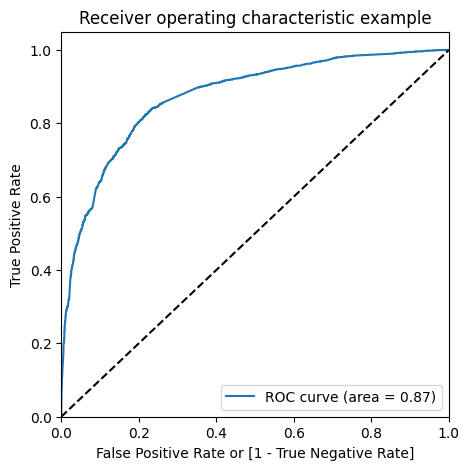

In [71]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

The area under the curve of the ROC is 0.87 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [72]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4715,0,0.227011,0,1,1,1,0,0,0,0,0,0,0
7132,1,0.593906,1,1,1,1,1,1,1,0,0,0,0
8954,0,0.506217,1,1,1,1,1,1,1,0,0,0,0
5283,0,0.190073,0,1,1,0,0,0,0,0,0,0,0
3003,0,0.577441,1,1,1,1,1,1,1,0,0,0,0


In [73]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384045  1.000000  0.000000
0.1   0.1  0.570965  0.971014  0.321536
0.2   0.2  0.729592  0.904992  0.620231
0.3   0.3  0.795918  0.832126  0.773343
0.4   0.4  0.801793  0.768116  0.822791
0.5   0.5  0.807205  0.691224  0.879518
0.6   0.6  0.786642  0.565217  0.924699
0.7   0.7  0.777675  0.495572  0.953564
0.8   0.8  0.756494  0.411031  0.971888
0.9   0.9  0.707019  0.251610  0.990964


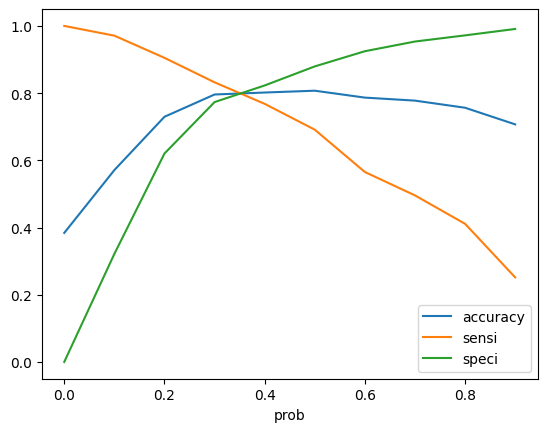

In [74]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.375, you get the optimal values of the three metrics. So let's choose 0.375 as our cutoff now.

In [75]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
4715,0,0.227011,0,1,1,1,0,0,0,0,0,0,0,0
7132,1,0.593906,1,1,1,1,1,1,1,0,0,0,0,1
8954,0,0.506217,1,1,1,1,1,1,1,0,0,0,0,1
5283,0,0.190073,0,1,1,0,0,0,0,0,0,0,0,0
3003,0,0.577441,1,1,1,1,1,1,1,0,0,0,0,1


In [76]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8007111935683364

In [77]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3169,  815],
       [ 474, 2010]])

In [78]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [79]:
# Calculate Sensitivity

TP/(TP+FN)

np.float64(0.8091787439613527)

In [80]:
# Calculate Specificity

TN/(TN+FP)

np.float64(0.7954317269076305)

##### The cut off point seems pretty good

#### Lets make the prediction on the test set

In [81]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [82]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Internal Sources,Last Activity_Chat Interaction,Last Activity_Lead Generation,Last Activity_Other,What is your current occupation_Working Professional,Last Notable Activity_Phone or SMS
4608,0,-0.428249,1,0,0,0,0,0,0,0
7935,1,0.805598,1,0,0,0,0,0,0,0
4043,1,-0.883879,1,0,0,0,0,0,0,0
7821,0,-0.298850,1,0,0,0,0,0,1,0
856,0,-0.521198,1,0,0,0,0,0,0,0


In [83]:
X_test_sm = sm.add_constant(X_test)

##### Making predictions on the test set

In [84]:
y_test_pred = res.predict(X_test_sm)

In [85]:
y_test_pred[:10]

4608    0.138807
7935    0.119978
4043    0.022081
7821    0.714897
856     0.127399
927     0.061198
318     0.971957
1018    0.131331
8151    0.336434
1570    0.985759
dtype: float64

In [86]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
4608,0.138807
7935,0.119978
4043,0.022081
7821,0.714897
856,0.127399


In [87]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [88]:
y_pred_final.head()

,Converted,0
4608,1,0.138807
7935,0,0.119978
4043,0,0.022081
7821,0,0.714897
856,0,0.127399


In [89]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Converted_Prob
4608,1,0.138807
7935,0,0.119978
4043,0,0.022081
7821,0,0.714897
856,0,0.127399


In [90]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_pred_final.head()

,Converted,Converted_Prob,final_predicted
4608,1,0.138807,0
7935,0,0.119978,0
4043,0,0.022081,0
7821,0,0.714897,1
856,0,0.127399,0


In [91]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8152958152958153

In [92]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1349,  346],
       [ 166,  911]])

In [93]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [94]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

np.float64(0.8458681522748375)

In [95]:
# Let us calculate specificity
TN / float(TN+FP)

np.float64(0.7958702064896755)

##### precision - recall 

In [96]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3504,  480],
       [ 767, 1717]])

##### precsion

In [97]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

np.float64(0.781520254893036)

##### recall

In [98]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

np.float64(0.6912238325281803)

In [99]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(4715    0
 7132    1
 8954    0
 5283    0
 3003    0
        ..
 5734    0
 5191    0
 5390    1
 860     0
 7270    1
 Name: Converted, Length: 6468, dtype: int64,
 4715    0
 7132    1
 8954    1
 5283    0
 3003    1
        ..
 5734    0
 5191    0
 5390    1
 860     0
 7270    1
 Name: Predicted, Length: 6468, dtype: int64)

In [100]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

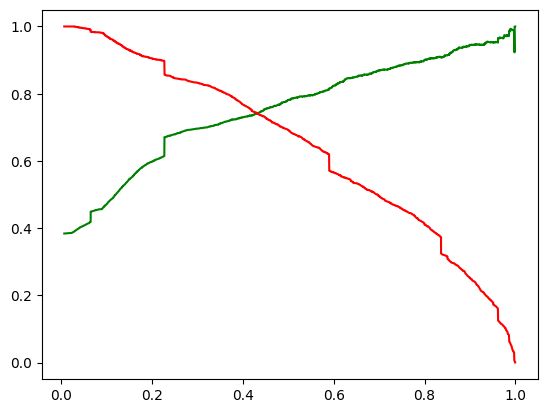

In [101]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [102]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
4715,0,0.227011,0,1,1,1,0,0,0,0,0,0,0,0
7132,1,0.593906,1,1,1,1,1,1,1,0,0,0,0,1
8954,0,0.506217,1,1,1,1,1,1,1,0,0,0,0,1
5283,0,0.190073,0,1,1,0,0,0,0,0,0,0,0,0
3003,0,0.577441,1,1,1,1,1,1,1,0,0,0,0,1


In [103]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8017934446505876

In [104]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3278,  706],
       [ 576, 1908]])

In [105]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [106]:
# Calculate Precision

TP/(TP+FP)

np.float64(0.7299158377964805)

In [107]:
# Calculate Recall

TP/(TP+FN)

np.float64(0.7681159420289855)

#### making prediction on test set

In [108]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [109]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
4608,0.138807
7935,0.119978
4043,0.022081
7821,0.714897
856,0.127399


In [110]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [111]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Check 'y_pred_final'
y_pred_final.head()

,Converted,0
4608,1,0.138807
7935,0,0.119978
4043,0,0.022081
7821,0,0.714897
856,0,0.127399


In [112]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Convert_Prob'})

# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Convert_Prob
4608,1,0.138807
7935,0,0.119978
4043,0,0.022081
7821,0,0.714897
856,0,0.127399


In [113]:
# Make predictions on the test set using 0.44 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.4 else 0)

# Check y_pred_final
y_pred_final.head()

,Converted,Convert_Prob,final_predicted
4608,1,0.138807,0
7935,0,0.119978,0
4043,0,0.022081,0
7821,0,0.714897,1
856,0,0.127399,0


In [114]:
# Let's check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8192640692640693

In [115]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1403,  292],
       [ 209,  868]])

In [116]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [117]:
# Calculate Precision
TP/(TP+FP)

np.float64(0.7482758620689656)

In [118]:
# Calculate Recall
TP/(TP+FN)

np.float64(0.8059424326833797)

Even though Specificity-Sensitivity and precision-recall give more or less same accuracy precision-recall is more suitable because,

. Precision is crucial when it's important to minimize false positives, i.e., when you want to ensure that most of the predicted leads marked as "converted" are indeed customers.

. Recall is important when missing potential customers (false negatives) is costly, i.e., when you want to catch as many true conversions as possible, even at the risk of some false positives.